In [1]:
import torch
import math
import numpy as np
import torchviz

In [8]:
x=torch.ones(5,1,4,1)
y=torch.arange(20).reshape(5,1,4)
(x + y).shape

torch.Size([5, 5, 4, 4])

In [9]:
x = torch.tensor([4, 5, 6])
# 注意输出形式：
torch.max(x, dim=0)[1]
print(x.data)

tensor([4, 5, 6])


In [10]:
class Exp(torch.autograd.Function):
    # Simple case where everything goes well
    @staticmethod
    def forward(ctx, x):
        # This time we save the output
        result = torch.exp(x)
        # Note that we should use `save_for_backward` here when
        # the tensor saved is an ouptut (or an input).
        ctx.save_for_backward(result)
        return result

    @staticmethod
    def backward(ctx, grad_out):
        result, = ctx.saved_tensors
        return result * grad_out

x = torch.tensor(1., requires_grad=True, dtype=torch.double).clone()
# Validate our gradients using gradcheck
torch.autograd.gradcheck(Exp.apply, x)
torch.autograd.gradgradcheck(Exp.apply, x)

True

In [12]:
device = torch.device('cpu')
dtype = torch.float

torch.manual_seed(231)
a = torch.randn((), device=device, dtype=dtype)
b = torch.randn((), device=device, dtype=dtype)
c = torch.randn((), device=device, dtype=dtype)
d = torch.randn((), device=device, dtype=dtype)
print(a, b, c, d)
print(a.shape, a.item())

tensor(-1.1106) tensor(0.0014) tensor(1.5280) tensor(-1.0778)
torch.Size([]) -1.1105817556381226


In [13]:
torch.manual_seed(231)
a = torch.randn((1), device=device, dtype=dtype)
b = torch.randn((1), device=device, dtype=dtype)
c = torch.randn((1), device=device, dtype=dtype)
d = torch.randn((1), device=device, dtype=dtype)
print(a, b, c, d)
print(a.shape, a.item())

tensor([-1.1106]) tensor([0.0014]) tensor([1.5280]) tensor([-1.0778])
torch.Size([1]) -1.1105817556381226


In [14]:
a = torch.linspace(0, 2 * math.pi, steps=25, requires_grad=True)
print(a)

tensor([0.0000, 0.2618, 0.5236, 0.7854, 1.0472, 1.3090, 1.5708, 1.8326, 2.0944,
        2.3562, 2.6180, 2.8798, 3.1416, 3.4034, 3.6652, 3.9270, 4.1888, 4.4506,
        4.7124, 4.9742, 5.2360, 5.4978, 5.7596, 6.0214, 6.2832],
       requires_grad=True)


tensor([ 0.0000e+00,  2.5882e-01,  5.0000e-01,  7.0711e-01,  8.6603e-01,
         9.6593e-01,  1.0000e+00,  9.6593e-01,  8.6603e-01,  7.0711e-01,
         5.0000e-01,  2.5882e-01, -8.7423e-08, -2.5882e-01, -5.0000e-01,
        -7.0711e-01, -8.6603e-01, -9.6593e-01, -1.0000e+00, -9.6593e-01,
        -8.6603e-01, -7.0711e-01, -5.0000e-01, -2.5882e-01,  1.7485e-07],
       grad_fn=<SinBackward0>)


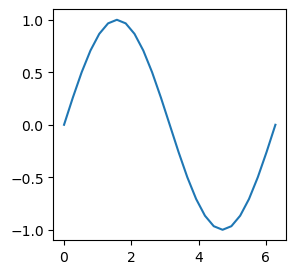

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(3, 3))
b = torch.sin(a)
plt.plot(a.detach(), b.detach()) # plot无法处理带grad的tensor，detach后才能处理
print(b)

In [16]:
# 
a = torch.linspace(0, 2 * math.pi, steps=25, requires_grad=True)
b = torch.sin(a)
c = 2 * b
d = c + 1
out = d.sum()

In [17]:
print('b:', b.grad_fn)
print('c:', c.grad_fn)
print('d:', d.grad_fn)
print('out:', out.grad_fn)

b: <SinBackward0 object at 0x7f6c68faea40>
c: <MulBackward0 object at 0x7f6c60a5d270>
d: <AddBackward0 object at 0x7f6c68faea40>
out: <SumBackward0 object at 0x7f6c60a5d270>


In [18]:
print('out:')
print(out.grad_fn)
print(out.grad_fn.next_functions)
print(out.grad_fn.next_functions[0][0].next_functions)
print(out.grad_fn.next_functions[0][0].next_functions[0][0].next_functions)
print(out.grad_fn.next_functions[0][0].next_functions[0][0].next_functions[0][0].next_functions)

out:
((<AddBackward0 object at 0x7f6c60aa29b0>, 0),)
((<MulBackward0 object at 0x7f6c60c155a0>, 0), (None, 0))
((<SinBackward0 object at 0x7f6c68fad240>, 0), (None, 0))
((<AccumulateGrad object at 0x7f6c60c155a0>, 0),)


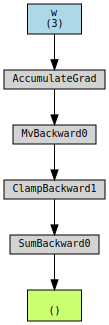

In [19]:
x = torch.randn(5, 3)
w = torch.randn(3, requires_grad=True)
y = x @ w
y = torch.clamp(y, min=0)
loss = y.sum()
loss.backward()

torchviz.make_dot(loss, params={'w':w})

In [20]:
import torch
a = torch.randn(5, requires_grad=True)
b = torch.ones(5, requires_grad=True)
y = a * b
y.grad_fn._saved_self is a, y.grad_fn._saved_other is b

(True, True)

In [21]:
a = torch.randn(5, requires_grad=True)
y = torch.exp(a)
y.grad_fn._saved_result is a, y.grad_fn._saved_result.equal(y)

(False, True)

In [22]:
a = torch.randn(3, requires_grad=True)
b = a.detach()
print(b, a)

tensor([-0.7871,  1.4755, -0.5347]) tensor([-0.7871,  1.4755, -0.5347], requires_grad=True)


In [23]:
x = torch.randn(5, 3)
w = torch.randn(3, requires_grad=True)
b = torch.randn(5, requires_grad=True)
t = torch.randn(5)

s = x @ w
y = s + b
loss = ((y - t) ** 2).sum()



In [24]:
import torch.nn as nn
import torch

import torch

# Create a tensor with requires_grad=True
x = torch.tensor([2.0], requires_grad=True)

# Perform operations
y1 = 2 * x  # Operation 1
y2 = x**2  # Operation 2
y = y1 + y2  # Operation 3

# Compute gradients
y.backward(retain_graph=True)

# Access gradients
print(x.grad)

tensor([6.])


In [25]:
x.grad = None  # Clear gradients
y1.backward(create_graph=True)
print('1:', x.grad)  # This would be None

x.grad = None  # Clear gradients
y2.backward(create_graph=True)
print('2:', x.grad)  # This would be None

x.grad = None  # Clear gradients
y.backward(create_graph=True)
print('3:', x.grad)  # This would be the gradient of y with respect to x


1: tensor([2.])
2: tensor([4.], grad_fn=<CopyBackwards>)
3: tensor([6.], grad_fn=<CopyBackwards>)


/home/roark/anaconda3/envs/231n/lib/python3.10/site-packages/torch/autograd/__init__.py:200: UserWarning: Using backward() with create_graph=True will create a reference cycle between the parameter and its gradient which can cause a memory leak. We recommend using autograd.grad when creating the graph to avoid this. If you have to use this function, make sure to reset the .grad fields of your parameters to None after use to break the cycle and avoid the leak. (Triggered internally at ../torch/csrc/autograd/engine.cpp:1151.)
  Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


Gradient of x: 1.0


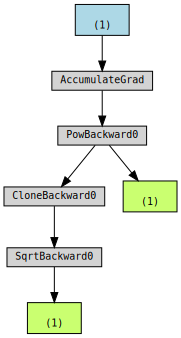

In [29]:
import torch

# Define a tensor with requires_grad=True
x = torch.tensor([2.0], requires_grad=True)

# Perform a computation
y = x**2

# Create a clone of y
y_clone = y.clone()

# Perform a second computation (e.g., derivative of y with respect to x)
z = y_clone.sqrt()

# Compute gradients
z.backward()

# Access gradients
grad = x.grad
print("Gradient of x:", grad.item())

torchviz.make_dot((z, y))